In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [2]:
def load_data(root):
    data = []
    total = 0
    folders = sorted(glob.glob(os.path.join(root, "*")))
    last_prefix = None

    for folder in folders:
        path, folder_name = os.path.split(folder)
        prefix, job_id = folder_name.split("_")
        if prefix == last_prefix:
            continue

        args = yaml.load(open(os.path.join(folder, "config.yaml"), "r"))
        filename = os.path.join(folder, "stats.pickle")
        if os.path.exists(filename):
            print(f"{len(data)}: {folder}")
            stats = torch.load(filename)
            data.append(dict(args=args,stats=stats))
            last_prefix = prefix
            
    return data

In [3]:
# python two_layer_new2.py -m multi=1,2,5,10 d=10,20,50,100 m=5,10,20 teacher_strength_decay=0 lr=0.1 use_sgd=true N_train=1000 num_epoch=50 num_iter_per_epoch=5000 batchsize=8 top_layer_fixed=true hydra/launcher=fairtask
root = "/checkpoint/yuandong/outputs/2019-09-14_23-12-05"
data = load_data(root)

0: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/0_17704540
1: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/10_17704547
2: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/11_17704533
3: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/12_17704538
4: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/13_17704537
5: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/14_17704557
6: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/15_17704554
7: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/16_17704561
8: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/17_17704568
9: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/18_17704578
10: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/19_17704531
11: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/1_17704545
12: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/20_17704541
13: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/21_17704553
14: /checkpoint/yuandong/outputs/2019-09-14_23-12-05/22_17704575
15: /checkpoint/yuandong/outputs/2019

In [4]:
def find_params(data, cond):
    for d in data:
        found = True
        for k, v in cond.items():
            if d["args"][k] != v:
                found = False
        if found:
            return d
    return None

def find_all_params(data, cond):
    all_d = []
    for d in data:
        found = True
        for k, v in cond.items():
            if d["args"][k] != v:
                found = False
        if found:
            all_d.append(d)
    return all_d

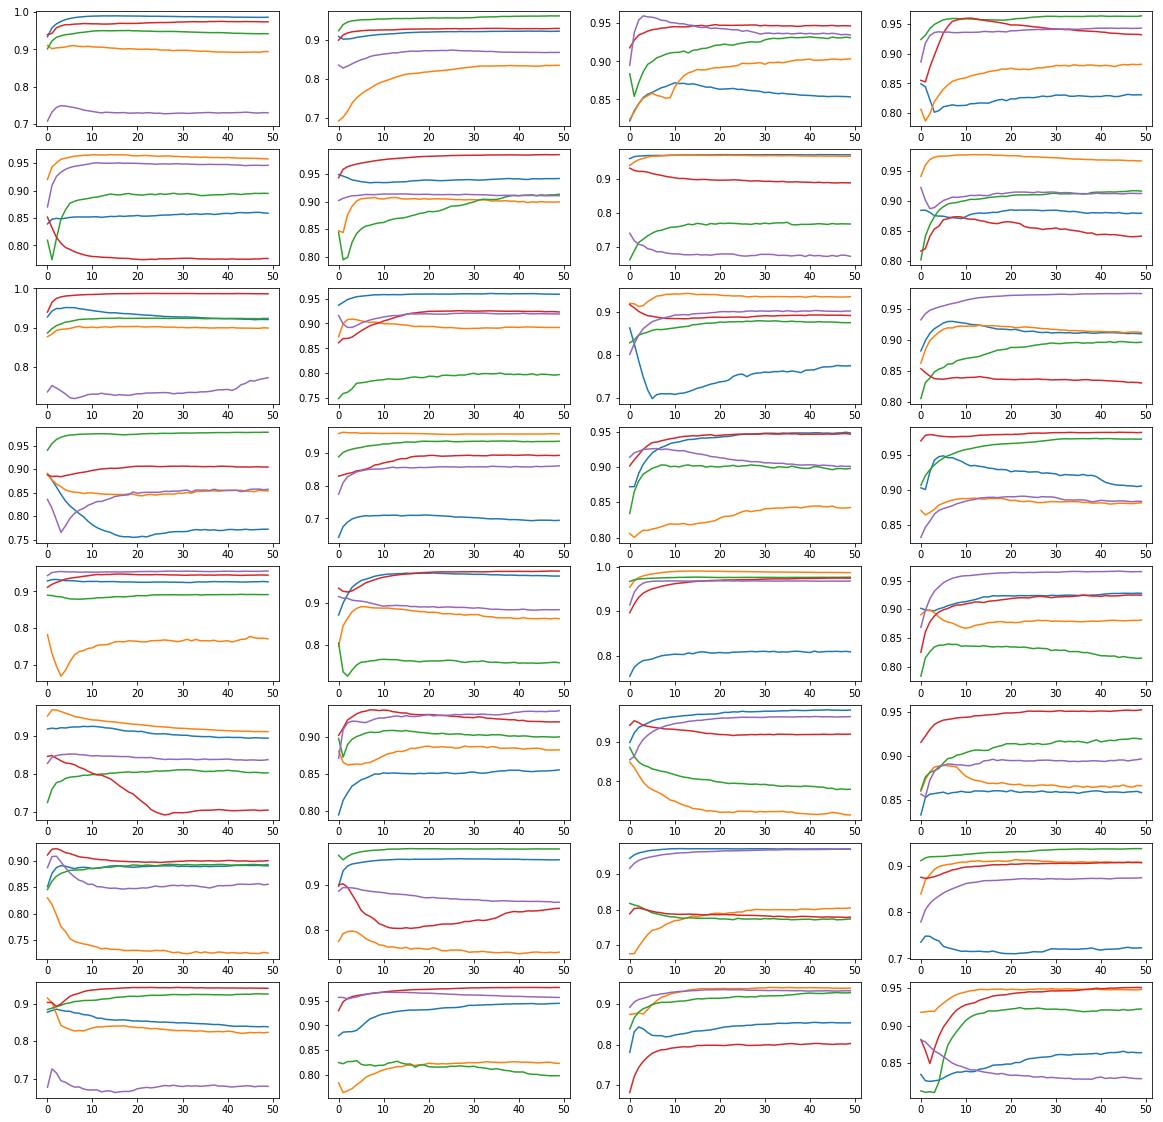

In [20]:
num_teacher = 5

d = find_params(data, dict(multi=5, d=20, m=num_teacher))

plt.figure(figsize=(20, 20))

for seed, stats in d["stats"].items():
    plt.subplot(8, 4, seed)
    max_corrs = torch.FloatTensor(len(stats) - 1, num_teacher)
    for i, s in enumerate(stats[1:]):
        max_corrs[i, :] = s["corr_eval"].max(dim=1)[0]
        
    plt.plot(max_corrs.numpy())
